In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

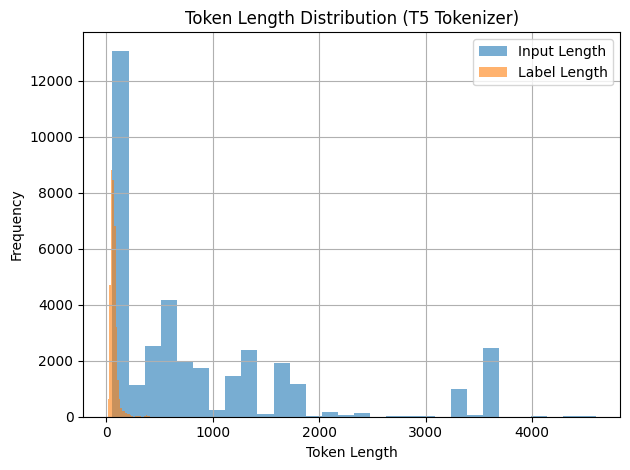

In [5]:
from datasets import load_dataset
from transformers import T5Tokenizer
import matplotlib.pyplot as plt

# Load dataset and tokenizer
dataset = load_dataset("neo4j/text2cypher-2025v1")
tokenizer = T5Tokenizer.from_pretrained("t5-base")

# Count token lengths
def count_tokens(example):
    schema = example.get("schema", "")
    question = example["question"]
    cypher = example["cypher"]
    input_text = f"translate question to cypher: <question> {question} </question> <schema> {schema} </schema>"
    
    input_ids = tokenizer(input_text, truncation=False, max_length=512)["input_ids"]
    label_ids = tokenizer(cypher, truncation=False, max_length=512)["input_ids"]
    
    return {
        "input_len": len(input_ids),
        "label_len": len(label_ids),
        "total_len": len(input_ids) + len(label_ids)
    }

# Map the token counting function
lengths = dataset["train"].map(count_tokens)

# Plot histograms
plt.hist(lengths["input_len"], bins=30, alpha=0.6, label="Input Length")
plt.hist(lengths["label_len"], bins=30, alpha=0.6, label="Label Length")
# plt.hist(lengths["total_len"], bins=30, alpha=0.6, label="Total Length")
plt.xlabel("Token Length")
plt.ylabel("Frequency")
plt.title("Token Length Distribution (T5 Tokenizer)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


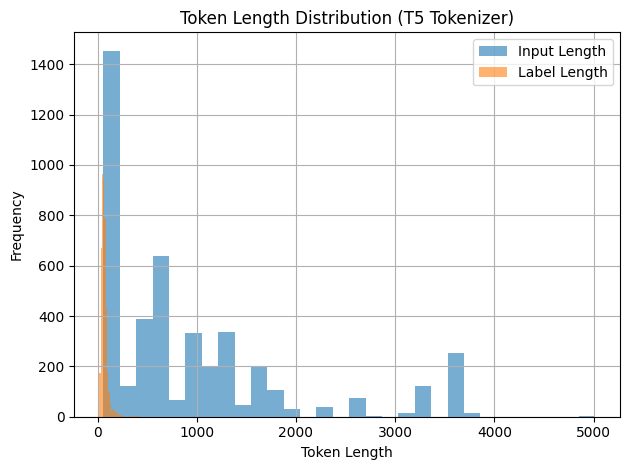

In [4]:
from datasets import load_dataset
from transformers import T5Tokenizer
import matplotlib.pyplot as plt

# Load dataset and tokenizer
dataset = load_dataset("neo4j/text2cypher-2025v1")
tokenizer = T5Tokenizer.from_pretrained("t5-base")

# Count token lengths
def count_tokens(example):
    schema = example.get("schema", "")
    question = example["question"]
    cypher = example["cypher"]
    input_text = f"translate question to cypher: <question> {question} </question> <schema> {schema} </schema>"
    
    input_ids = tokenizer(input_text, truncation=False, max_length=512)["input_ids"]
    label_ids = tokenizer(cypher, truncation=False, max_length=512)["input_ids"]
    
    return {
        "input_len": len(input_ids),
        "label_len": len(label_ids),
        "total_len": len(input_ids) + len(label_ids)
    }

# Map the token counting function
lengths = dataset["test"].map(count_tokens)

# Plot histograms
plt.hist(lengths["input_len"], bins=30, alpha=0.6, label="Input Length")
plt.hist(lengths["label_len"], bins=30, alpha=0.6, label="Label Length")
# plt.hist(lengths["total_len"], bins=30, alpha=0.6, label="Total Length")
plt.xlabel("Token Length")
plt.ylabel("Frequency")
plt.title("Token Length Distribution (T5 Tokenizer)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
